## Loading the Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

df = pd.read_csv("palmer_penguins.csv")

Meet Julia, (yes, her parents did indeed name her after their favorite programming language) she's a polar ecologist studying the different species of penguins. One aspect of her work (unfortunately) consists of collecting measurements from penguins. In case, you didn't know this - penguins are extemely slippery. Very cute but very dangerously slippery.

That's exactly how Julia lost one particularly slipperly gentoo. It just slid out of her hands and before she knew it, it was long gone. Is this becoming a recurring theme in my life? she thinks.  She had all the measurements except for body mass. Ugh, so close. What to do? Hmm, maybe since the simple perceptron worked so well, maybe she could work her way up to a regression-esque model and use the previous data to estimate the penguin's weight. Diabolical. 

## Preparing the Data

In [3]:
#filtering our current dataframe to create a dataframe of only one kind of penguin
gentoo = df[df.species == "Gentoo"]
gentoo = gentoo.dropna()
gentoo = gentoo.drop('Unnamed: 0', 1)

Lets have a look at the summary statistics for the gentoo data.

In [4]:
gentoo.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,119.000000,119.000000,119.000000,119.000000
mean,47.568067,14.996639,217.235294,5092.436975
std,3.106116,0.985998,6.585431,501.476154
min,40.900000,13.100000,203.000000,3950.000000
25%,45.350000,14.200000,212.000000,4700.000000
50%,47.400000,15.000000,216.000000,5050.000000
75%,49.600000,15.750000,221.500000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


## Data Visualization

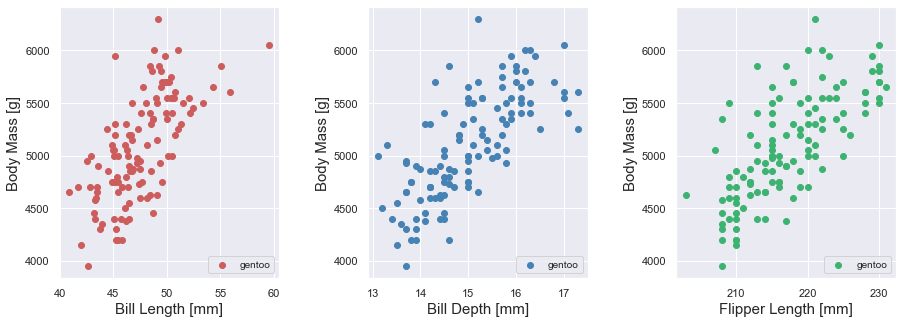

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# scatter of gentoo datapoints with bill length vs body mass
ax1.scatter(gentoo.bill_length_mm, 
            gentoo.body_mass_g, 
            color = "indianred", 
            label = "gentoo")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Body Mass [g]", fontsize = 15)
ax1.legend(fontsize = 10, loc = "lower right")


# scatter of gentoo datapoints with bill depth vs body mass
ax2.scatter(gentoo.bill_depth_mm, 
            gentoo.body_mass_g, 
            color = "steelblue", 
            label = "gentoo")
ax2.set_xlabel("Bill Depth [mm]", fontsize = 15)
ax2.set_ylabel("Body Mass [g]", fontsize = 15)
ax2.legend(fontsize = 10, loc = "lower right")

# scatter of gentoo datapoints with flipper vs body mass
ax3.scatter(gentoo.flipper_length_mm, 
            gentoo.body_mass_g, 
            color = "mediumseagreen", 
            label = "gentoo")
ax3.set_xlabel("Flipper Length [mm]", fontsize = 15)
ax3.set_ylabel("Body Mass [g]", fontsize = 15)
ax3.legend(fontsize = 10, loc = "lower right")


plt.subplots_adjust(wspace=0.4)
plt.show()

Err, but wait. This is an interesting and helpful and all but wouldn't the distrubtion of body mass be distributed differently depending on gentoo's sex? Hmm, lets investigate this idea. 

In [6]:
gentoo_f = gentoo[gentoo.sex == "Female"]
gentoo_m = gentoo[gentoo.sex == "Male"]

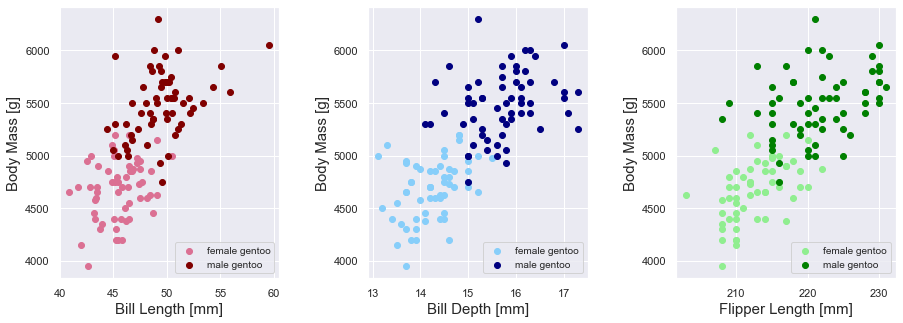

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# scatter of male/female gentoo datapoints with bill length vs body mass
ax1.scatter(gentoo_f.bill_length_mm, 
            gentoo_f.body_mass_g, 
            color = "palevioletred", 
            label = "female gentoo")
ax1.scatter(gentoo_m.bill_length_mm, 
            gentoo_m.body_mass_g, 
            color = "maroon", 
            label = "male gentoo")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Body Mass [g]", fontsize = 15)
ax1.legend(fontsize = 10, loc = "lower right")

# scatter of male/female gentoo datapoints with bill depth vs body mass
ax2.scatter(gentoo_f.bill_depth_mm, 
            gentoo_f.body_mass_g, 
            color = "lightskyblue", 
            label = "female gentoo")
ax2.scatter(gentoo_m.bill_depth_mm, 
            gentoo_m.body_mass_g, 
            color = "navy", 
            label = "male gentoo")
ax2.set_xlabel("Bill Depth [mm]", fontsize = 15)
ax2.set_ylabel("Body Mass [g]", fontsize = 15)
ax2.legend(fontsize = 10, loc = "lower right")

# scatter of male/female gentoo datapoints with flipper length vs body mass
ax3.scatter(gentoo_f.flipper_length_mm, 
            gentoo_f.body_mass_g, 
            color = "lightgreen", 
            label = "female gentoo")
ax3.scatter(gentoo_m.flipper_length_mm, 
            gentoo_m.body_mass_g, 
            color = "green", 
            label = "male gentoo")
ax3.set_xlabel("Flipper Length [mm]", fontsize = 15)
ax3.set_ylabel("Body Mass [g]", fontsize = 15)
ax3.legend(fontsize = 10, loc = "lower right")

plt.subplots_adjust(wspace=0.4)
plt.show()

Aha! Knew it. From all three graphs we can see that the data points for female gentoo and male gentoo are almost linearly seperable. Lets keep this observation in mind once we've successfully built our regression neuron.

## Building a Single Regression Neuron

In [8]:
def linear_activation(z):
    return z

class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


Now that we've built our neuron, let's see how accurately we're able to figure out the body mass.

## Testing the Neuron

### Bill Length

4.81 % - Not bad!


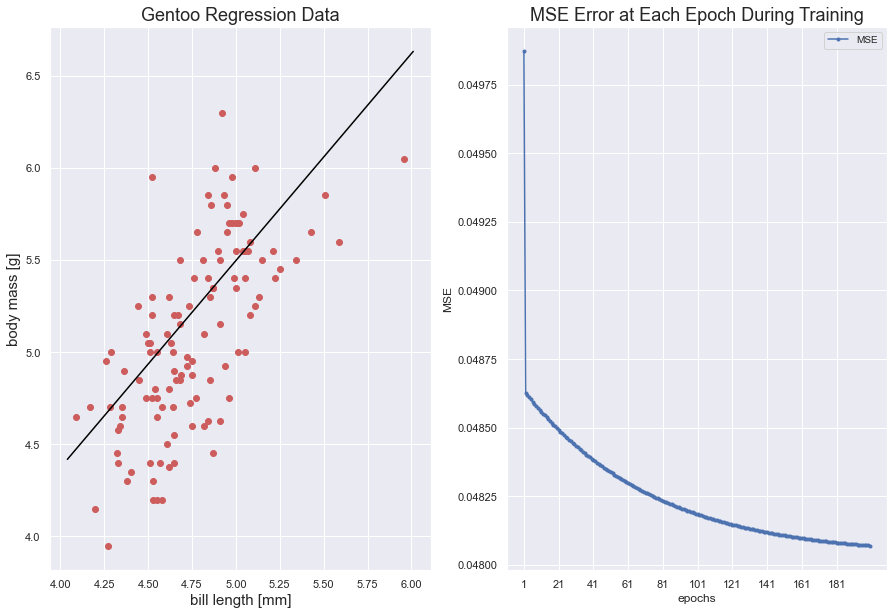

In [9]:
#Preparing the data

#Scalling the data
Xb = gentoo.bill_length_mm.values/10
Xb = Xb.reshape(-1, 1)
y = gentoo.body_mass_g.values/1000

domainb = np.linspace(np.min(Xb) - .05, np.max(Xb) + .05, 100)

#Instantiating the linear regressor
# alpha = 0.01 and epoch = 200
nodeb = SingleNeuron(linear_activation)
nodeb.train(Xb, y, alpha = .01, epochs = 200)#.0000001

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

#Plotting the linear regressor
ax1.scatter(Xb, y, color = "indianred")
ax1.plot(domainb, nodeb.predict(domainb.reshape(-1, 1)),color='black')
ax1.set_xlabel("bill length [x10 mm]", fontsize = 15)
ax1.set_ylabel("body mass [x1000 g]", fontsize = 15)
ax1.set_title("Gentoo Regression Data", fontsize = 18)

#Plotting the mean-squared error
ax2.plot(range(1, len(nodeb.errors_) + 1), 
         nodeb.errors_,
         marker = ".",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(nodeb.errors_) + 1, 20))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
print(round(nodeb.errors_[-1]*100,2),"% - Not bad!")

### Bill Depth

5.87 % - Hmm, could be better!


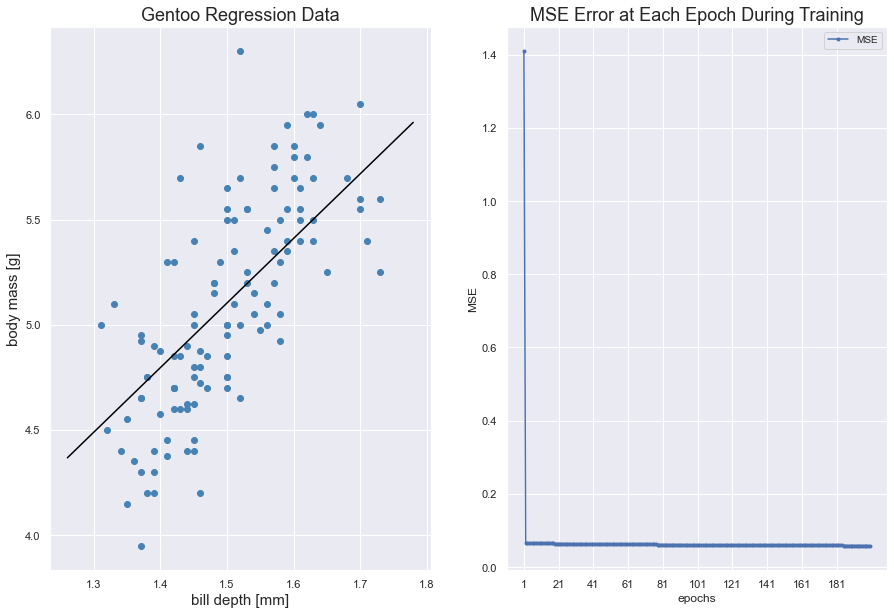

In [10]:
#Preparing the data

#Scalling the data
Xd = gentoo.bill_depth_mm.values/10
Xd = Xd.reshape(-1, 1)
y = gentoo.body_mass_g.values/1000

domaind = np.linspace(np.min(Xd) - .05, np.max(Xd) + .05, 100)

#Instantiating the linear regressor
# alpha = 0.01 and epoch = 200
noded = SingleNeuron(linear_activation)
noded.train(Xd, y, alpha = .01, epochs = 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

#Plotting the linear regressor
ax1.scatter(Xd, y, color = "steelblue")
ax1.plot(domaind, noded.predict(domaind.reshape(-1, 1)),color='black')
ax1.set_xlabel("bill depth [x10 mm]", fontsize = 15)
ax1.set_ylabel("body mass [x1000 g]", fontsize = 15)
ax1.set_title("Gentoo Regression Data", fontsize = 18)

#Plotting the mean-squared error
ax2.plot(range(1, len(noded.errors_) + 1), 
         noded.errors_,
         marker = ".",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(noded.errors_) + 1, 20))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
print(round(noded.errors_[-1]*100,2),"% - Hmm, could be better!")

### Flipper Length

7.31 % - Definetly needs some work!


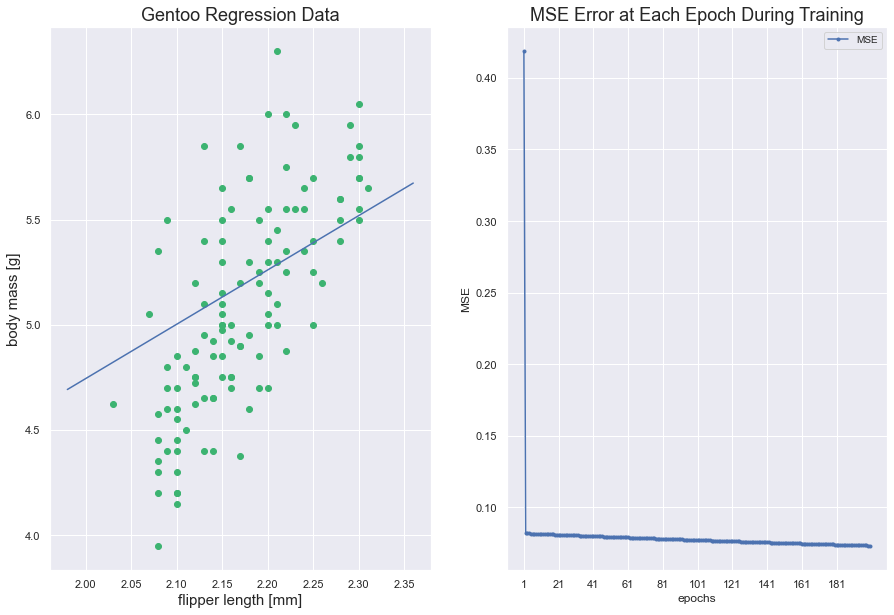

In [11]:
#Preparing the data

#Scalling the data
X = gentoo.flipper_length_mm.values/100
X = X.reshape(-1, 1)
y = gentoo.body_mass_g.values/1000

#Instantiating the linear regressor
# alpha = 0.01 and epoch = 200
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .01, epochs = 200)#.0000001


domain = np.linspace(np.min(X) - .05, np.max(X) + .05, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

#Plotting the linear regressor
ax1.scatter(X, y, color = "mediumseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("flipper length [x100 mm]", fontsize = 15)
ax1.set_ylabel("body mass [x1000 g]", fontsize = 15)
ax1.set_title("Gentoo Regression Data", fontsize = 18)

#Plotting the mean-squared error
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = ".",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 20))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
print(round(node.errors_[-1]*100,2),"% - Definetly needs some work!")

If we were starved of choice and we only had to use only one of these variable - we should use bill length!

## Alpha Choice

What about alpha choice? Can we improve upon our current error, if we use a different value for alpha? Let's see.

The lowest error for alpha =  0.01  in 1000 epochs is  0.048
The lowest error for alpha =  0.05  in 1000 epochs is  0.01
The lowest error for alpha =  0.07  in 1000 epochs is  0.173
The lowest error for alpha =  0.09  in 1000 epochs is  2.909


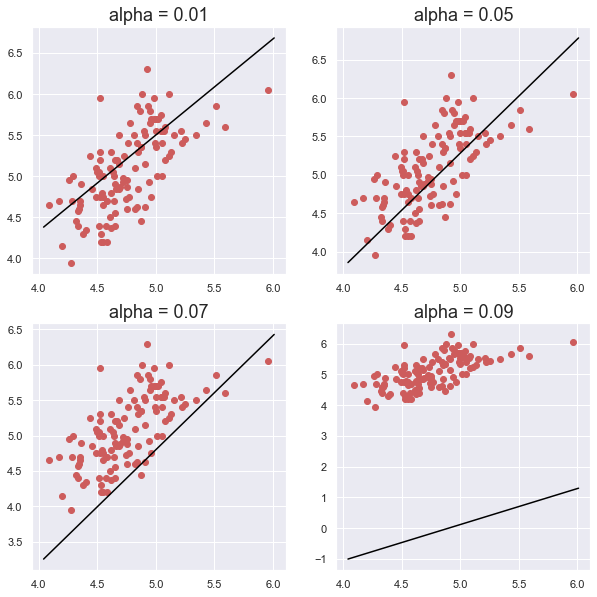

In [22]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(Xb) - .05, np.max(Xb) + .05, 200)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(Xb, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)),color='black')
    ax.scatter(Xb, y, color = "indianred")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)
    print("The lowest error for alpha = ",alpha," in 1000 epochs is ", round(node.errors_[-1],3))

My oh my! Look at that error range. Clearly, if we had to choose the best error rate it would be around alpha = 0.05. 

Lets see if we can narrow it down a bit more.

In [13]:
alphas = np.linspace(0.01,0.07,100)
errb = []

for alpha in alphas:
    node = SingleNeuron(linear_activation)
    node.train(Xb, y, alpha = alpha, epochs = 200)
    errb.append(node.errors_[-1])

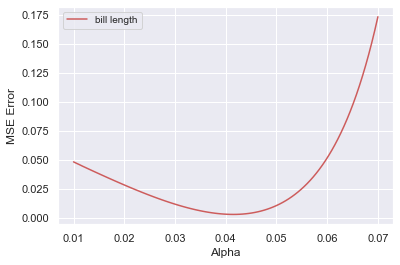

In [14]:
plt.plot(alphas, errb, color='indianred',label = "bill length")
plt.xlabel('Alpha')
plt.ylabel('MSE Error')
plt.legend(fontsize=10)

The optimal value of alpha is 0.042

Right now, we have two things going in our favour. First, we're using bill_length_mm and second, we've find out the value for alpha that'll give us the lowest error rate. Or so it seems? 

Doesn't this also bring up the question of is bill_length_mm a better predictor for the bill_depth_mm or flipper_length_mm? What if we caught bill_length at a better alpha value than the other two. Perhaps a graph of alpha vs. error for all three variables will shed light on this.

In [16]:
errd = []
err = []

for alpha in alphas:
    node = SingleNeuron(linear_activation)
    node.train(Xd, y, alpha = alpha, epochs = 200)
    errd.append(node.errors_[-1])
    node.train(X, y, alpha = alpha, epochs = 200)
    err.append(node.errors_[-1])

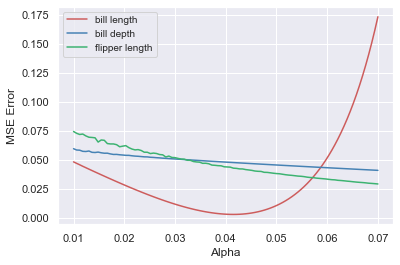

In [17]:
plt.plot(alphas, errb, color='indianred',label = "bill length")
plt.plot(alphas, errd, color='steelblue',label ="bill depth")
plt.plot(alphas, err, color='mediumseagreen',label ="flipper length")
plt.xlabel('Alpha')
plt.ylabel('MSE Error')
plt.legend(fontsize=10)

I guess that settles it. Bill length is the best indicator (at least from our observation so far )! 

## Investigating Effect of Sex

We noticed above that bill length seemed to have the lowest amount of error for predicting the mass of a gentoo penguin. Can we bring this number even lower by factoring in the penguin's sex? Lets find out!

Text(0.5, 1.0, 'Gentoo Regression Data')

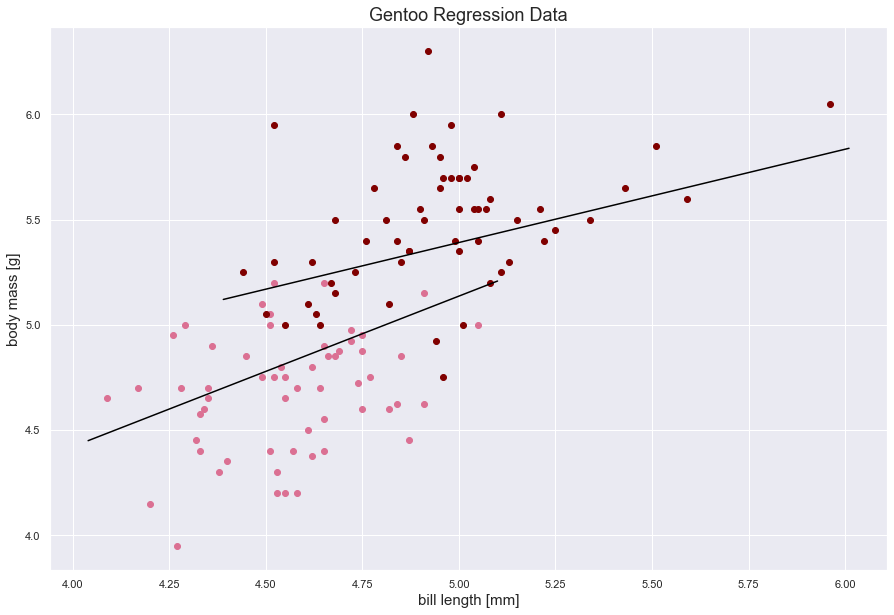

In [18]:
#Preparing the data

#Gentoo female data
Xb_f = gentoo_f.bill_length_mm.values/10
Xb_f = Xb_f.reshape(-1, 1)
y_f = gentoo_f.body_mass_g.values/1000

#Gentoo male data
Xb_g = gentoo_m.bill_length_mm.values/10
Xb_g = Xb_g.reshape(-1, 1)
y_g = gentoo_m.body_mass_g.values/1000

# Regressor for male gentoo data points
domainbf = np.linspace(np.min(Xb_f) - .05, np.max(Xb_f) + .05, 100)
nodebf = SingleNeuron(linear_activation)
nodebf.train(Xb_f, y_f, alpha = .01, epochs = 200)

# Regressor for female gentoo data points
domainbg = np.linspace(np.min(Xb_g) - .05, np.max(Xb_g) + .05, 100)
nodebg = SingleNeuron(linear_activation)
nodebg.train(Xb_g, y_g, alpha = .042, epochs = 200)

fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

# Gentoo female data points and regressor
ax1.scatter(Xb_f, y_f, color = "palevioletred")
ax1.plot(domainbf, nodebf.predict(domainbf.reshape(-1, 1)), color= 'black')
ax1.set_xlabel("bill length [x10 mm]", fontsize = 15)
ax1.set_ylabel("body mass [x1000 g]", fontsize = 15)
ax1.set_title("Gentoo Regression Data", fontsize = 18)

# Gentoo male data points and regressor
ax1.scatter(Xb_g, y_g, color = "maroon")
ax1.plot(domainbg, nodebg.predict(domainbg.reshape(-1, 1)), color= 'black')
ax1.set_xlabel("bill length [x10 mm]", fontsize = 15)
ax1.set_ylabel("body mass [x1000 g]", fontsize = 15)
ax1.set_title("Gentoo Regression Data", fontsize = 18)

0.001  - Regressor error for male gentoo data
0.028  - Regressor error for female gentoo data!
The average error using two regressors is  0.014204433357710195


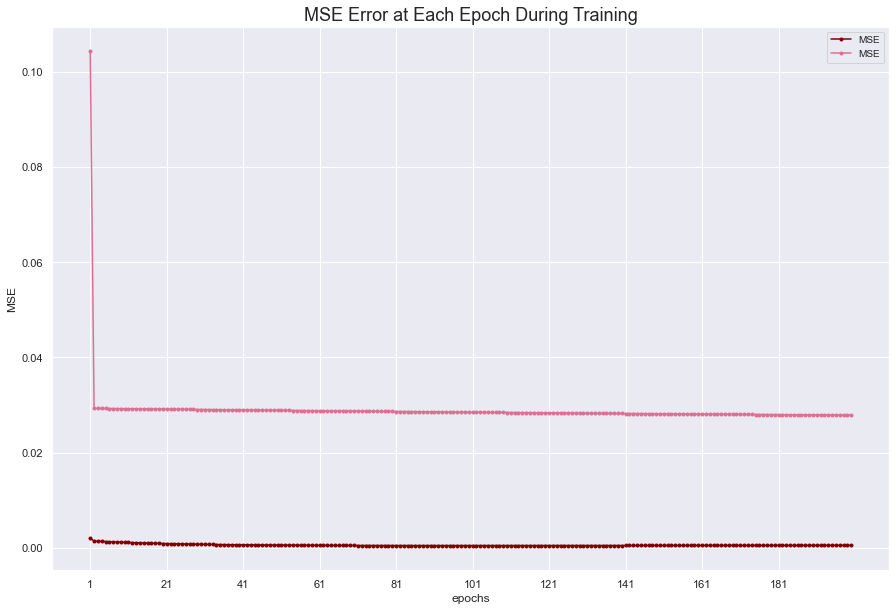

In [21]:
fig, (ax2) = plt.subplots(1, 1, figsize=(15,10))
ax2.plot(range(1, len(nodebg.errors_) + 1), 
         nodebg.errors_,
         marker = ".",
         label = "MSE",color='maroon')
ax2.plot(range(1, len(nodebf.errors_) + 1), 
         nodebf.errors_,
         marker = ".",
         label = "MSE",color='palevioletred')
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(nodeb.errors_) + 1, 20))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
print(round(nodebg.errors_[-1],3)," - Regressor error for male gentoo data")
print(round(nodebf.errors_[-1],3)," - Regressor error for female gentoo data!")
print("The average error using two regressors is ",(nodebg.errors_[-1]*len(nodebg.errors_)+nodebf.errors_[-1]*len(nodebf.errors_))/(len(nodebf.errors_)+len(nodebg.errors_)))

One of the main limitations of our initial model - using bill length with an alpha value of 0.042 is that we are limited by the behavior of different subgroups within the gentoo penguin data. As illustrated above, one main subgroup is sex - the behavior of which is different (as we saw with the prescense of the two dissimilar line for each of the two subgroups). This increases the error of the model<br>
<br>
An easy fix is to incorporate sex in the model and that should improve our error even more!